In [1]:
import numpy as np
import pandas as pd
import xlrd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")

In [3]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df['account length'].max()

243

In [5]:
df["churn"].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

C:\Users\wjsdn\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

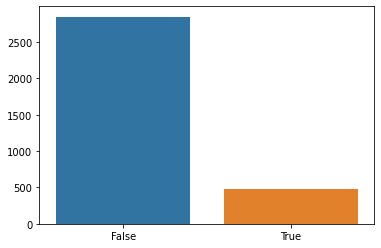

In [6]:
data = df["churn"].value_counts()
#print (y)
sns.barplot(data.index, data.values)

In [7]:
df['target'] = df['churn'].replace(False, 0)
df['target'] = df['target'].replace(True, 1)

In [8]:
df[['customer service calls', 'churn']]

,customer service calls,churn
0,1,False
1,1,False
2,0,False
3,2,False
4,3,False
...,...,...
3328,2,False
3329,3,False
3330,2,False
3331,2,False


In [9]:
df.groupby(['customer service calls','churn']).size()

customer service calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       False      26
                        True       40
6                       False       8
                        True       14
7                       False       4
                        True        5
8                       False       1
                        True        1
9                       True        2
dtype: int64

Text(0, 0.5, 'number of customers')

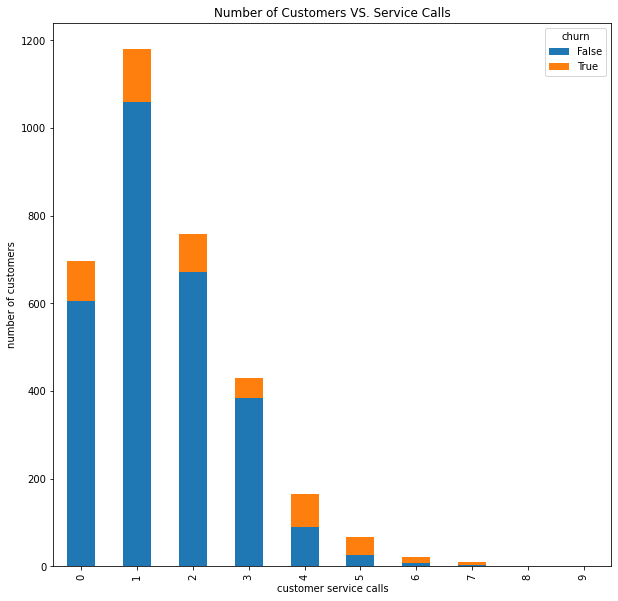

In [10]:
ax = df.groupby(['customer service calls','churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10)) 
ax.set_title("Number of Customers VS. Service Calls")
ax.set_ylabel("number of customers")

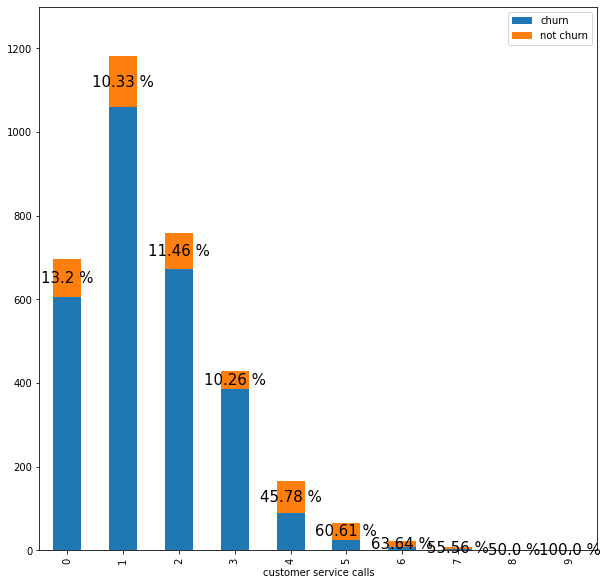

In [11]:
true_perc = df.groupby('customer service calls')['churn'].mean()*100
true_count = df.groupby('customer service calls')['churn'].sum()
false_count = df.groupby('customer service calls')['churn'].count() - df.groupby('customer service calls')['churn'].sum()

# final df
df_perc = pd.concat([false_count, true_count], axis=1)
df_perc.columns = ['churn', 'not churn']

# create plot
ax = df_perc.plot( kind='bar', stacked=True, figsize=(10,10))

# getting the  containers values
container_t = ax.containers[1]

# create custom labels 
labels = [f'{round(val, 2)} %' if  (val != 0) else '' for val in true_perc]

# annotate with the previous custom labels
ax.bar_label(container_t, labels=labels, label_type='center', fontsize=15)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

# show plot
plt.show()

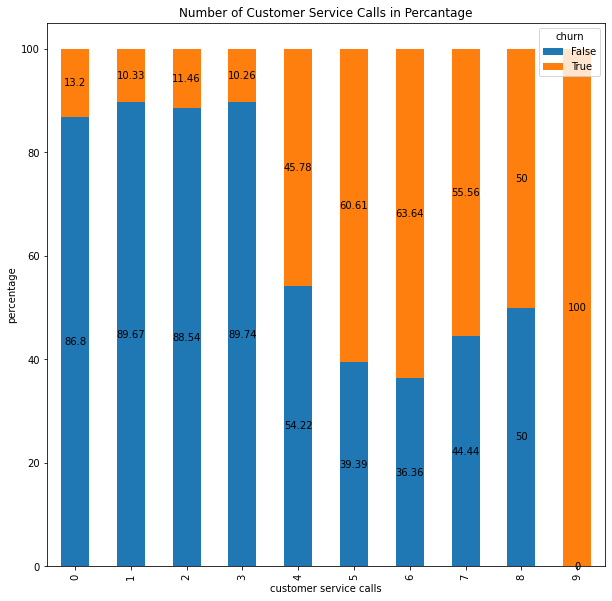

In [12]:
percentage_df = df.groupby(['customer service calls', 'churn']).size().groupby(level=0).apply(
    lambda x: np.round(100*x/x.sum(),2))

ax = percentage_df.unstack().plot(kind='bar', stacked=True, figsize=(10,10)) 
ax.set_title("Number of Customer Service Calls in Percantage")
ax.set_ylabel("percentage")
for c in ax.containers:
    ax.bar_label(c, label_type='center',color='black')

In [13]:
#fdf = df[['state', 'account length', 'international plan', 'voice mail plan', 'customer service calls', 'churn']]
fdf = df.copy()
fdf['international plan'] = df['international plan'].map({'no':0, 'yes':1})
fdf['voice mail plan'] = df['voice mail plan'].map({'no':0, 'yes':1})
fdf

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,target
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0


In [32]:
logreg = LogisticRegression(random_state=1)
X = fdf[['account length', 'international plan', 'voice mail plan', 'customer service calls']]
y = fdf['churn']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8563425370148059


In [35]:
print(model.score(X_test, y_test))

0.854916067146283


In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('accuracy : {0:.2f}, precision : {1:.2f}, recall : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

In [37]:
pred = model.predict(X_test)
metrics(y_test, pred)

accuracy : 0.85, precision : 0.51, recall : 0.16
f1-score : 0.24, auc : 0.57


In [38]:
print(model.coef_)

[[ 0.04341316  0.5825067  -0.39691565  0.62222278]]


In [39]:
smote = SMOTE(random_state=1, sampling_strategy = 0.35)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [40]:
smote_model = LogisticRegression()
smote_model.fit(X_train_over, y_train_over)
smote_pred = smote_model.predict(X_test)
metrics(y_test, smote_pred)

accuracy : 0.85, precision : 0.45, recall : 0.26
f1-score : 0.33, auc : 0.60


In [41]:
y_train_over.value_counts() / len(y_train_over)

False    0.740818
True     0.259182
Name: churn, dtype: float64

In [115]:
wj = np.array([46, 0, 0, 6])
sample = np.array([wj])
sample = scaler.transform(sample)

C:\Users\wjsdn\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
sample_pred = model.predict(sample)
print(sample_pred)

[False]


In [117]:
print(model.predict_proba(sample))

[[0.55759432 0.44240568]]


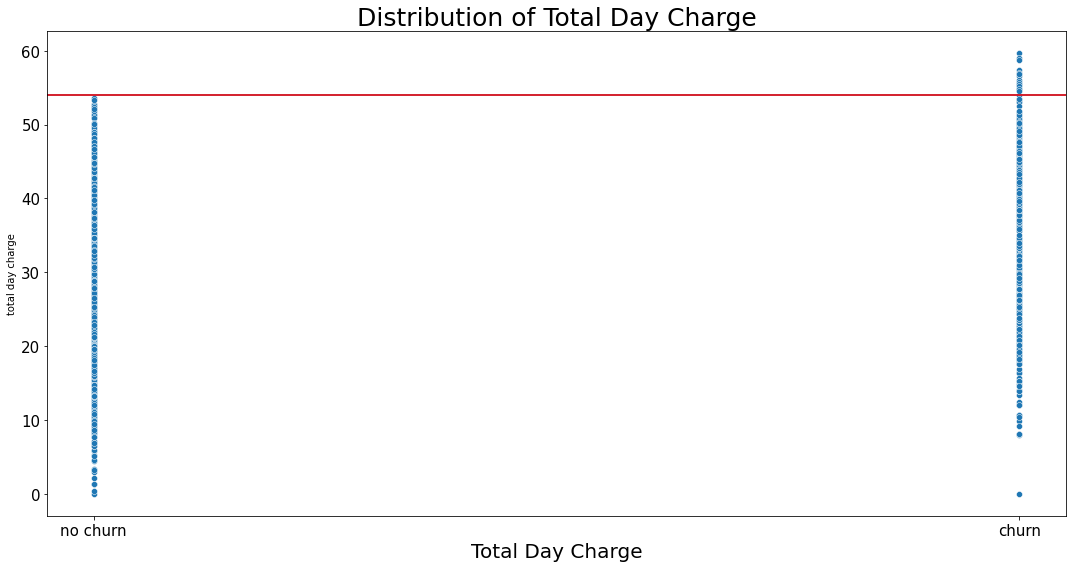

In [118]:
df_churn_no_churn = df.copy()
def categorise(row):
    if row['churn'] == 1:
        return "churn"
    else:
        return 'no churn'
df_churn_no_churn["churn_no_churn"] = df.apply(lambda row: categorise(row), axis =1)
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
sns.scatterplot(x="churn_no_churn",y="total day charge", data = df_churn_no_churn)
ax.axhline(54.03)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Charge', fontsize = 20)
ax.axhline(54.03, color = 'red')
plt.tight_layout()

In [119]:
# df['international plan'] = fdf['international plan'].map({'no':0, 'yes':1})
# df['voice mail plan'] = fdf['voice mail plan'].map({'no':0, 'yes':1})

# logreg = LogisticRegression(random_state=1)
# X2 = df.drop(columns = ["state", "area code", "phone number"])
# y2 = fdf['churn']

# #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.5)
# X_train, X_test, y_train, y_test = train_test_split(X2, y2)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# model = LogisticRegression()
# model.fit(X_train, y_train)
# print(model.score(X_train, y_train))

# smote = SMOTE(random_state=0)
# X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

# smote_model = LogisticRegression()
# smote_model.fit(X_train_over, y_train_over)
# smote_pred = smote_model.predict(X_test)
# metrics(y_test, smote_pred)